# OpenDataTools 支持黑色系现货数据

In [1]:
# 导入spot接口
from opendatatools import spot

## 数据接口

In [32]:
# 获取现货指标
df_indicator = spot.get_commodity_spot_indicator()
df_indicator.head(20)

,indicator_id,indicator_name
0,65,钢材指数
1,61,铁矿指数
2,64,焦炭指数
3,1002,煤炭指数
4,1003,水泥指数
5,1100,FTZ指数
6,118,钢铁行业PMI指数
7,119,钢铁行业PMI生产指数
8,120,钢铁行业PMI新订单指数
9,121,钢铁行业PMI新出口订单指数


In [33]:
# 获取现货数据
# 例如：铁矿指数
df, msg = spot.get_commodity_spot_indicator_data('61')
df.head(20)

,change,chg_pct,date,value
0,0.00,0.00%,2018-06-21,640.00
1,0.00,0.00%,2018-06-20,640.00
2,0.00,0.00%,2018-06-19,640.00
3,-5.00,-0.78%,2018-06-15,640.00
4,0.00,0.00%,2018-06-14,645.00
5,0.00,0.00%,2018-06-13,645.00
6,0.00,0.00%,2018-06-12,645.00
7,0.00,0.00%,2018-06-11,645.00
8,0.00,0.00%,2018-06-08,645.00
9,0.00,0.00%,2018-06-07,645.00


In [ ]:
import datetime
df['date'] = df['date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
df['value'] = df['value'].apply(lambda x : float(x))
df.set_index('date', inplace=True)

In [24]:
def draw_indicator(id):
    
    from matplotlib.pylab import mpl
    # 指定默认字体
    mpl.rcParams['font.sans-serif'] = ['FangSong']
    # 解决保存图像是负号'-'显示为方块的问题
    mpl.rcParams['axes.unicode_minus'] = False
    
    # 获取现货数据
    df, msg = spot.get_commodity_spot_indicator_data(id)
    import datetime
    df['date'] = df['date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
    df['value'] = df['value'].apply(lambda x : float(x))
    df.set_index('date', inplace=True)
    
    df_indicator = spot.get_commodity_spot_indicator()
    df_indicator.set_index('indicator_id', inplace=True)
    name = df_indicator.loc[id]['indicator_name']
    
    # 画图
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))
    plt.plot(df.index, df['value'])
    plt.title(name)

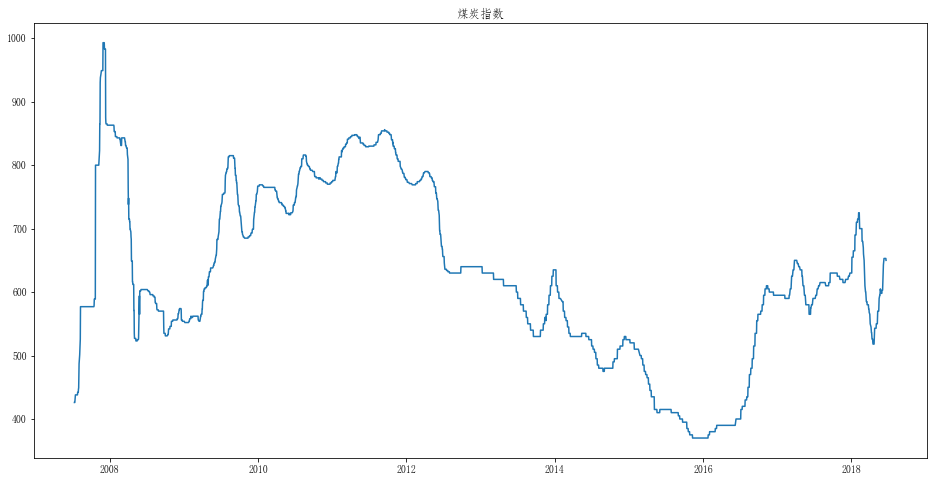

In [34]:
draw_indicator('1002')